# Import Libraries

In [42]:
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import numpy as np
import plotly.express as px

In [43]:
df_dum = pd.read_pickle('df_dum.pkl')
df_dum.head()

date  floor_area_sqm  lease_commence_date  resale_price  month  year  \
0  2012-03            45.0                 1986      250000.0      3  2012   
1  2012-04            60.0                 1986      302500.0      4  2012   
2  2012-05            60.0                 1986      295000.0      5  2012   
3  2012-06            45.0                 1986      259000.0      6  2012   
4  2012-08            45.0                 1986      263000.0      8  2012   

                address  remaining_lease_years  max_floor_lvl  commercial  \
0  172 ANG MO KIO AVE 4                     72           10.0         0.0   
1  172 ANG MO KIO AVE 4                     72           10.0         0.0   
2  172 ANG MO KIO AVE 4                     72           10.0         0.0   
3  172 ANG MO KIO AVE 4                     72           10.0         0.0   
4  172 ANG MO KIO AVE 4                     72           10.0         0.0   

   ...  min_dist_mrt  school_5km  preschool_5km  mrt_5km  school_1km  \
0  ...    1225.25108           1              1        1           1   
1  ...    1225.25108           1              1        1           1   
2  ...    1225.25108           1              1        1           1   
3  ...    1225.25108           1              1        1           1   
4  ...    1225.25108           1              1        1           1   

   preschool_1km  mrt_1km  min_dist_attraction  min_dist_market  \
0              1        0          2091.604628       348.422916   
1              1        0          2091.604628       348.422916   
2              1        0          2091.604628       348.422916   
3              1        0          2091.604628       348.422916   
4              1        0          2091.604628       348.422916   

   min_dist_hawker  
0       283.493115  
1       283.493115  
2       283.493115  
3       283.493115  
4       283.493115  

[5 rows x 101 columns]

In [44]:
df = pd.read_pickle('df.pkl')

# Profile Report

In [45]:
prof_df_dum = ProfileReport(df_dum, minimal=True)

In [46]:
prof_df_dum

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof_df = ProfileReport(df, minimal=True)

In [7]:
prof_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Heatmap

In [38]:
df_dum.corr()[['resale_price']].sort_values(by='resale_price', ascending=True)

resale_price
flat_type_3 room              -0.491184
flat_model_new generation     -0.298732
own_units                     -0.237323
flat_model_simplified         -0.138515
commercial                    -0.127253
...                                 ...
year                           0.624965
resale_price                   1.000000
school_5km                          NaN
preschool_5km                       NaN
mrt_5km                             NaN

[99 rows x 1 columns]

<AxesSubplot:>

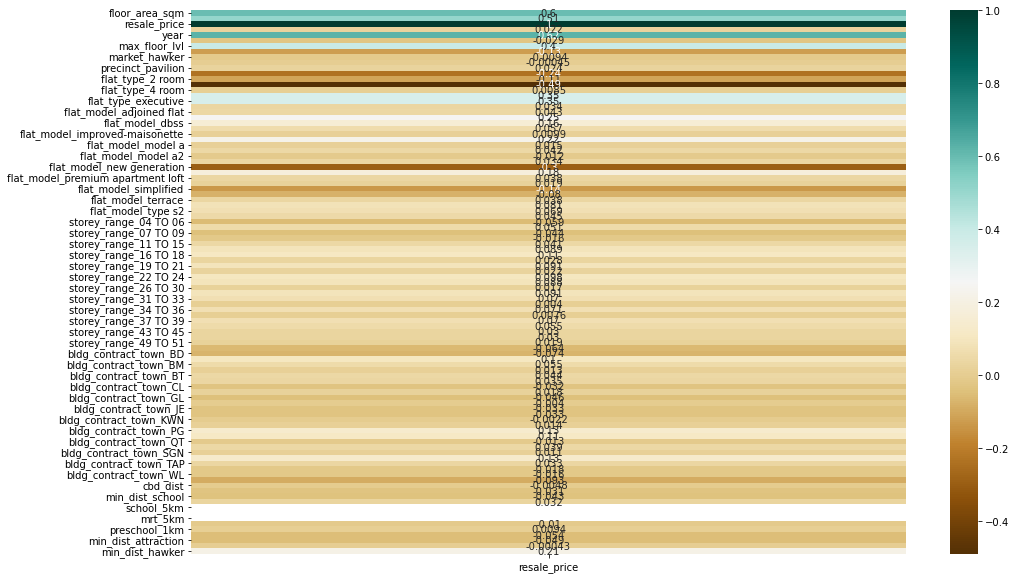

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(df_dum.corr()[['resale_price']], cmap='BrBG', annot=True)

In [40]:
df.corr()[['resale_price']].sort_values(by='resale_price', ascending=True)

resale_price
own_units                 -0.237323
commercial                -0.127253
remaining_lease_years     -0.028910
market_hawker             -0.009416
multistorey_carpark       -0.000446
month                      0.021931
precinct_pavilion          0.023511
max_floor_lvl              0.398784
lease_commence_date        0.505686
floor_area_sqm             0.596343
year                       0.624965
resale_price               1.000000

<AxesSubplot:>

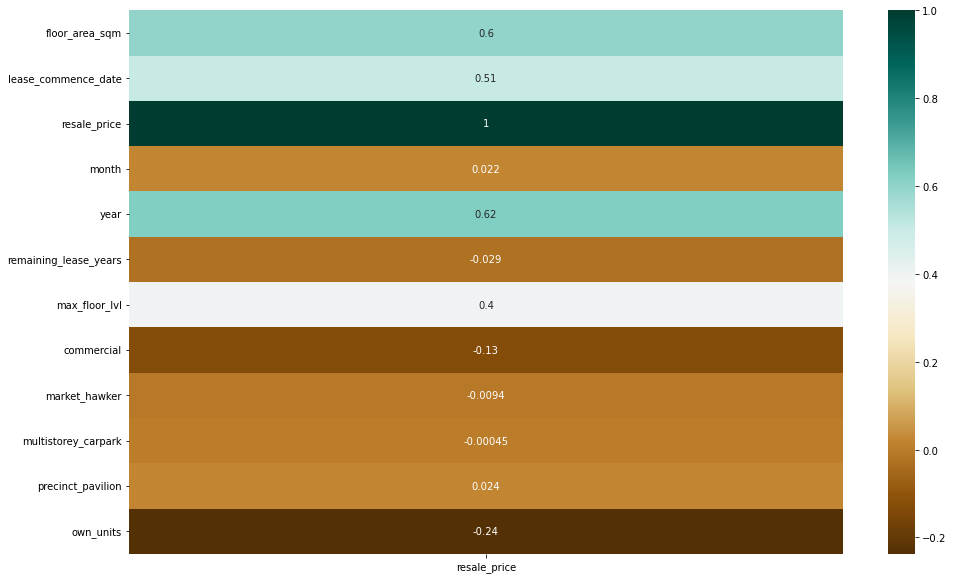

In [41]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr()[['resale_price']], cmap='BrBG', annot=True)

## Resale Price Index

In [10]:
resale_price_index = pd.read_csv('hdb-resale-price-index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv') # resale price index
resale_price_index.head()

quarter  index
0  1990-Q1   24.3
1  1990-Q2   24.4
2  1990-Q3   25.0
3  1990-Q4   24.7
4  1991-Q1   24.9

In [11]:
print(resale_price_index['quarter'].max())
print(resale_price_index['quarter'].min())
print(resale_price_index['index'].max())
print(resale_price_index['index'].min())

2021-Q3
1990-Q1
150.6
24.3


In [12]:
plt.figure(figsize=(20,10))

# x axis values
x = resale_price_index['quarter']
# corresponding y axis values
y = resale_price_index['index']
 
# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=1)
 
# setting x and y axis range
plt.ylim(0,160)

# naming the x axis
plt.xlabel('year and quarter')

# naming the y axis
plt.ylabel('index')
 
# giving a title to my graph
plt.title('HDB Resale Price Index')

# draw and then rotate x labels
plt.draw()
plt.xticks(rotation = 90)

# function to show the plot
plt.show()

/var/folders/03/nt1zy8vj7rxctlnddhy4_dxm0000gn/T/ipykernel_32254/2652342231.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Analysis

Text text text here

# Change Data to Georeadable Points

In [13]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt
%matplotlib inline

/Users/kanochromia/miniforge3/envs/dsi-sg/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [14]:
df_coordinates = pd.read_pickle('df_coordinates.pkl')
crs = {'init':'epsg:4326'}
df_coordinates.head()

latitude         longitude blk_no             road_name  \
0  1.37469423247424  103.836462867365    172   ANG MO KIO AVENUE 4   
1  1.37340092645025  103.849073244454    510   ANG MO KIO AVENUE 8   
2  1.37939470300077  103.839157232686    610   ANG MO KIO AVENUE 4   
3  1.36275784702216  103.858015323667    474  ANG MO KIO AVENUE 10   
4  1.37986658053966  103.835976650638    604   ANG MO KIO AVENUE 5   

  postal_code                address      cbd_dist  min_dist_mrt  \
0      560172   172 ANG MO KIO AVE 4  10272.654718   1225.251080   
1      560510   510 ANG MO KIO AVE 8   9999.142279    387.259718   
2      560610   610 ANG MO KIO AVE 4  10744.156103    695.243470   
3      560474  474 ANG MO KIO AVE 10   8850.822251   1230.967399   
4      560604   604 ANG MO KIO AVE 5  10845.915674   1019.940777   

   min_dist_preschool  min_dist_school  school_5km  preschool_5km  mrt_5km  \
0            0.000000       171.556816           1              1        1   
1          144.811788       278.280714           1              1        1   
2            0.000000       320.574526           1              1        1   
3          207.965418       565.646778           1              1        1   
4          160.359299       420.789161           1              1        1   

   school_1km  preschool_1km  mrt_1km  
0           1              1        0  
1           1              1        1  
2           1              1        1  
3           1              1        0  
4           1              1        0

In [15]:
df_coordinates['longitude'] = df_coordinates['longitude'].astype(float)
df_coordinates['latitude'] = df_coordinates['latitude'].astype(float)

In [16]:
df_coordinates.dtypes # just to double confirm

latitude              float64
longitude             float64
blk_no                 object
road_name              object
postal_code            object
address                object
cbd_dist              float64
min_dist_mrt          float64
min_dist_preschool    float64
min_dist_school       float64
school_5km              int64
preschool_5km           int64
mrt_5km                 int64
school_1km              int64
preschool_1km           int64
mrt_1km                 int64
dtype: object

In [17]:
geometry = [Point(xy) for xy in zip(df_coordinates['longitude'], df_coordinates['latitude'])]
geometry[:3]

In [18]:
geo_df = gpd.GeoDataFrame(df_coordinates, # specify data
                         crs = crs, # specify coordinate reference system
                         geometry = geometry) # specify geometry list we created

/Users/kanochromia/miniforge3/envs/dsi-sg/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
geo_df.to_file("geo_df.shp")

/Users/kanochromia/miniforge3/envs/dsi-sg/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/03/nt1zy8vj7rxctlnddhy4_dxm0000gn/T/ipykernel_32254/2382379099.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df.to_file("geo_df.shp")


In [20]:
# Let's load some Singapore Data!
shp_link = 'singapore-residents-by-subzone-and-type-of-dwelling-june-2016/singapore-residents-by-subzone-and-type-of-dwelling-june-2016-shp/SUBZONE_DWELLING_TYPE_2016.shp'
street_map = gpd.read_file(shp_link)

print(geo_df.shape)
geo_df.head()

(9327, 17)


latitude   longitude blk_no             road_name postal_code  \
0  1.374694  103.836463    172   ANG MO KIO AVENUE 4      560172   
1  1.373401  103.849073    510   ANG MO KIO AVENUE 8      560510   
2  1.379395  103.839157    610   ANG MO KIO AVENUE 4      560610   
3  1.362758  103.858015    474  ANG MO KIO AVENUE 10      560474   
4  1.379867  103.835977    604   ANG MO KIO AVENUE 5      560604   

                 address      cbd_dist  min_dist_mrt  min_dist_preschool  \
0   172 ANG MO KIO AVE 4  10272.654718   1225.251080            0.000000   
1   510 ANG MO KIO AVE 8   9999.142279    387.259718          144.811788   
2   610 ANG MO KIO AVE 4  10744.156103    695.243470            0.000000   
3  474 ANG MO KIO AVE 10   8850.822251   1230.967399          207.965418   
4   604 ANG MO KIO AVE 5  10845.915674   1019.940777          160.359299   

   min_dist_school  school_5km  preschool_5km  mrt_5km  school_1km  \
0       171.556816           1              1        1           1   
1       278.280714           1              1        1           1   
2       320.574526           1              1        1           1   
3       565.646778           1              1        1           1   
4       420.789161           1              1        1           1   

   preschool_1km  mrt_1km                   geometry  
0              1        0  POINT (103.83646 1.37469)  
1              1        1  POINT (103.84907 1.37340)  
2              1        1  POINT (103.83916 1.37939)  
3              1        0  POINT (103.85802 1.36276)  
4              1        0  POINT (103.83598 1.37987)

<AxesSubplot:>

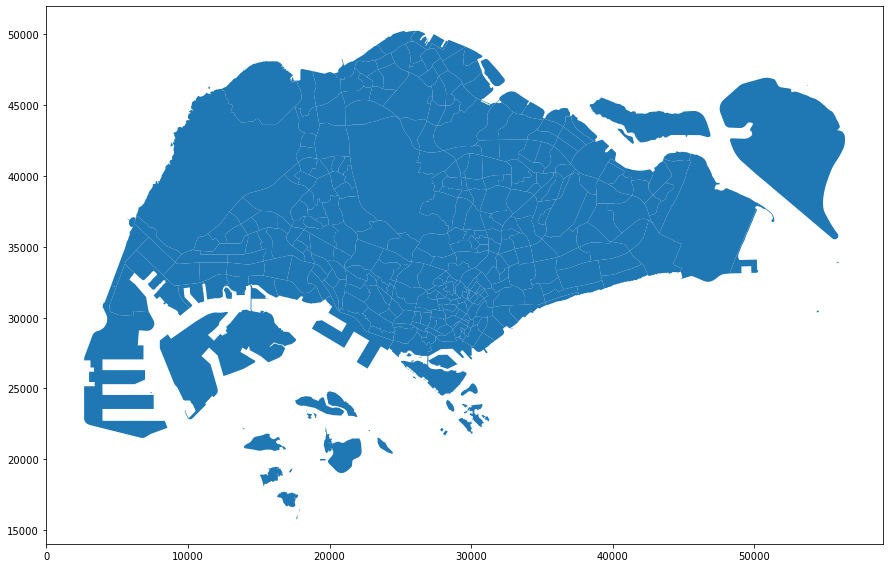

In [21]:
# just a map of singapore
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [22]:
# make sure both maps (singapore map and hdb plots) have a common CRS
# so that they will align
geo_df = geo_df.to_crs(street_map.crs) 

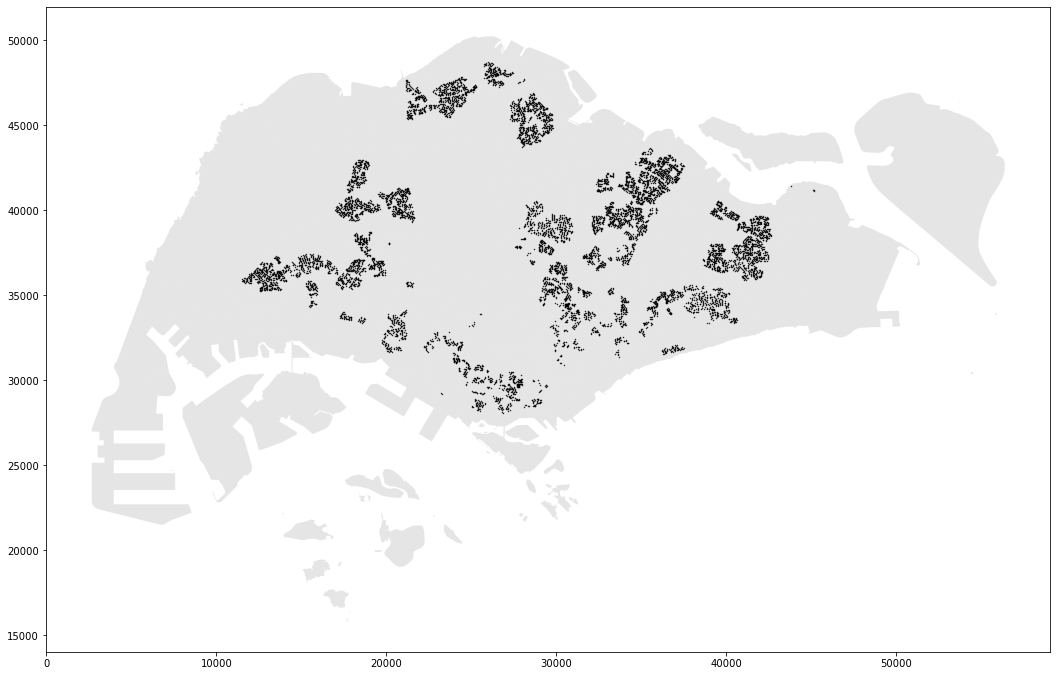

In [23]:
fig,ax = plt.subplots(figsize=(18,18))
street_map.plot(ax = ax, alpha = 0.2, color='grey')
geo_df.geometry.plot(ax = ax, markersize = 0.2, color = 'black', marker='o', label='House')
plt.show()

# this map shows the HDB residential blocks that have been sold prior to January 2022.

In [31]:
print(df[df['flat_model']=='new generation']['lease_commence_date'].max())
print(df[df['flat_model']=='new generation']['lease_commence_date'].min())

1999
1976


In [37]:
df[df['address']=='562 ANG MO KIO AVE 3']

date flat_type storey_range  floor_area_sqm      flat_model  \
2431    2012-04    4 room     06 TO 10            92.0  new generation   
8896    2012-07    4 room     04 TO 06            92.0  new generation   
23873   2013-04    4 room     07 TO 09            92.0  new generation   
39619   2014-04    4 room     04 TO 06            92.0  new generation   
47787   2014-10    4 room     07 TO 09            92.0  new generation   
...         ...       ...          ...             ...             ...   
811519  2011-06    4 room     07 TO 09            92.0  new generation   
827120  2015-01    4 room     10 TO 12            92.0  new generation   
830898  2015-04    4 room     01 TO 03            92.0  new generation   
835798  2015-07    4 room     10 TO 12            92.0  new generation   
840283  2015-10    4 room     10 TO 12            92.0  new generation   

        lease_commence_date  resale_price  month  year               address  \
2431                   1980      445000.0      4  2012  562 ANG MO KIO AVE 3   
8896                   1980      451800.0      7  2012  562 ANG MO KIO AVE 3   
23873                  1980      478000.0      4  2013  562 ANG MO KIO AVE 3   
39619                  1980      448000.0      4  2014  562 ANG MO KIO AVE 3   
47787                  1980      445000.0     10  2014  562 ANG MO KIO AVE 3   
...                     ...           ...    ...   ...                   ...   
811519                 1980      395000.0      6  2011  562 ANG MO KIO AVE 3   
827120                 1980      416888.0      1  2015  562 ANG MO KIO AVE 3   
830898                 1980      410888.0      4  2015  562 ANG MO KIO AVE 3   
835798                 1980      415000.0      7  2015  562 ANG MO KIO AVE 3   
840283                 1980      423000.0     10  2015  562 ANG MO KIO AVE 3   

        remaining_lease_years  max_floor_lvl  commercial  market_hawker  \
2431                       66           13.0         1.0            0.0   
8896                       66           13.0         1.0            0.0   
23873                      65           13.0         1.0            0.0   
39619                      64           13.0         1.0            0.0   
47787                      64           13.0         1.0            0.0   
...                       ...            ...         ...            ...   
811519                     67           13.0         1.0            0.0   
827120                     63           13.0         1.0            0.0   
830898                     63           13.0         1.0            0.0   
835798                     63           13.0         1.0            0.0   
840283                     63           13.0         1.0            0.0   

        multistorey_carpark  precinct_pavilion bldg_contract_town  own_units  
2431                    0.0                0.0                AMK       95.0  
8896                    0.0                0.0                AMK       95.0  
23873                   0.0                0.0                AMK       95.0  
39619                   0.0                0.0                AMK       95.0  
47787                   0.0                0.0                AMK       95.0  
...                     ...                ...                ...        ...  
811519                  0.0                0.0                AMK       95.0  
827120                  0.0                0.0                AMK       95.0  
830898                  0.0                0.0                AMK       95.0  
835798                  0.0                0.0                AMK       95.0  
840283                  0.0                0.0                AMK       95.0  

[88 rows x 18 columns]